# Principal Components for Dimensionality Reduction 

In [1]:
import numpy as np
from numpy import linalg
from scipy.io import loadmat
import matplotlib.pyplot as plt

#### Compute Covariance and Correlation - A small bit of **functional connectivity**

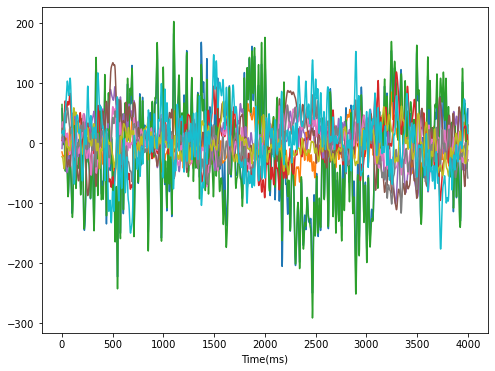

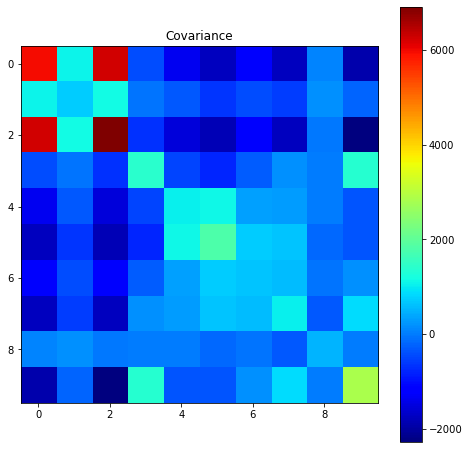

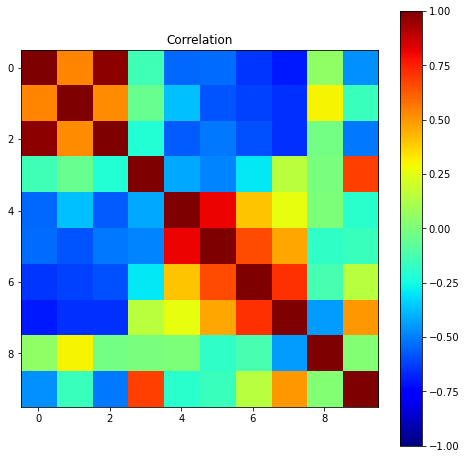

In [2]:
eeg = loadmat('data/eeg_full.mat') #load a big EEG data set
data = eeg['data'] 
channels10 = [8,21,23,35,49,65,78,87,98,115]
data10 = data[:,channels10] #select 10 channels, distributed over head, note here channels are columns not rows. 
plt.figure(figsize=(8,6))
plt.plot(data10)
plt.xlabel('Time(ms)')
plt.show()
data10 = np.transpose(data10)  #python likes variables in rows. 
C10 = np.cov(data10) #compute covariance
R10 = np.corrcoef(data10) #compute correlation coefficient
plt.figure(figsize = (8,8))
plt.imshow(C10,cmap='jet') 
plt.colorbar()
plt.title('Covariance')
plt.show()
plt.figure(figsize = (8,8))
plt.imshow(R10,vmin=-1,vmax=1,cmap='jet')
plt.colorbar()
plt.title('Correlation')
plt.show()

#### Calculate eigenvalues and eigenvectors and evaluate how much of the variance of the data is in each component. 

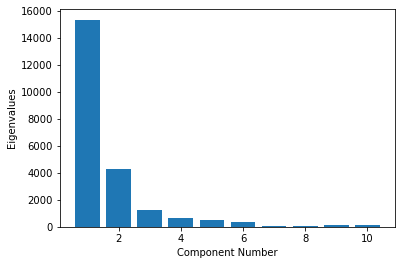

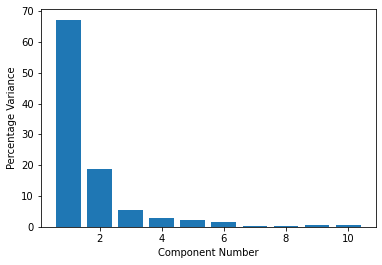

Text(0.5, 0, 'Component Number')

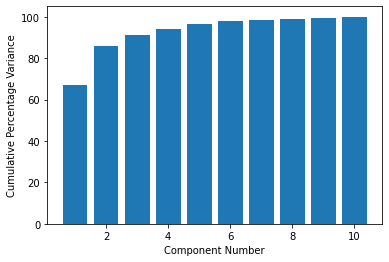

In [3]:
d,v = linalg.eig(C10)  #compute eigenvalues and eigenvectors 
plt.figure()
plt.bar(np.arange(1,11,1),d) #plot variance associated with each eigenvector
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')
plt.show()
percentvariance = 100*d/np.sum(d) #plot variance for each eigenvector as a % of total 
plt.figure()
plt.bar(np.arange(1,11,1),percentvariance)
plt.ylabel('Percentage Variance')
plt.xlabel('Component Number')
plt.show()
cumpercentvar = np.cumsum(percentvariance) #plot cumulative variance for each eigenvector.  
plt.figure()
plt.bar(np.arange(1,11,1),cumpercentvar)
plt.ylabel('Cumulative Percentage Variance')
plt.xlabel('Component Number')

#### Project the data to compute the principal component signals.  

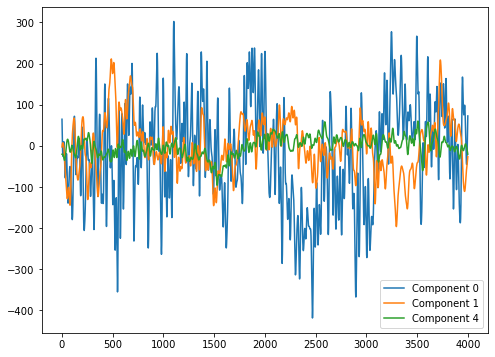

In [4]:
compEEG = np.transpose(v)@data10 #project the data onto the eigenvectors 
plt.figure(figsize = (8,6)) #plot a few component time series 
plt.plot(compEEG[0,:],label='Component 0') 

plt.plot(compEEG[1,:],label='Component 1') 
plt.plot(compEEG[4,:],label='Component 4') 
plt.legend()
plt.show()

#### Approximating an EEG signal with just a few principal components.   

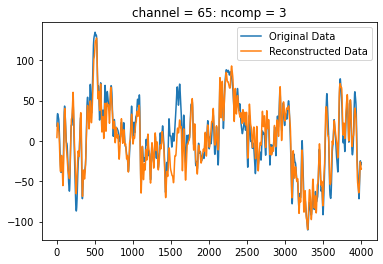

In [9]:
ncomponents = 3  #determine number of components to keep 
v_components  = v[:,np.arange(0,ncomponents,1)] #keep only the columns of v corresponding to components to keep
compEEG_components = compEEG[np.arange(0,ncomponents,1),:] #keep only corresponding component time series
data10recovered = v_components@compEEG_components #recover the data with subset of components
plt.figure()
plt.plot(data10[5,:],label='Original Data') #I arbitrarily chose 6th channel to plot. 
plt.plot(data10recovered[5,:],label='Reconstructed Data') #This is the approximation
plt.legend()
plt.title('channel = ' + str(channels10[5]) + ': ncomp = ' + str(ncomponents))
plt.show()


#### Principal Component Loading on the Original EEG signals 

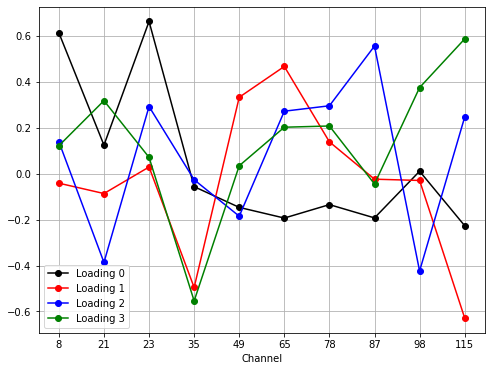

In [6]:
plt.figure(figsize = (8,6))
plt.plot(v[:,0],'ko-',label='Loading 0')
plt.plot(v[:,1],'ro-',label='Loading 1')
plt.plot(v[:,2],'bo-',label='Loading 2')
plt.plot(v[:,3],'go-',label='Loading 3')
plt.xlabel('Channel')
plt.xticks(range(10),labels = channels10)
plt.legend()
plt.grid()
plt.show()

what is prinicple comnet a analy
load/ vector 